In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

## 0.

In [3]:
height_weight_df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [4]:
height_weight_df.describe()

,Height(Inches),Weight(Pounds)
count,200.000000,200.000000
mean,67.949800,127.221950
std,1.940363,11.960959
min,63.430000,97.900000
25%,66.522500,119.895000
50%,67.935000,127.875000
75%,69.202500,136.097500
max,73.900000,158.960000


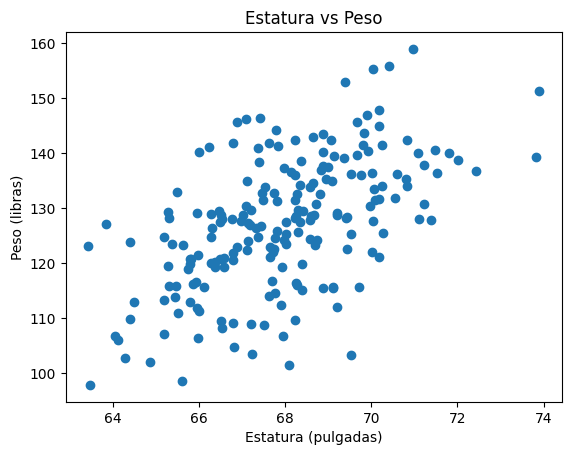

In [5]:
plt.scatter(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])
plt.xlabel('Estatura (pulgadas)')
plt.ylabel('Peso (libras)')
plt.title('Estatura vs Peso')
plt.show()

# 1. Count records in the dataframe

In [6]:
height_weight_df.count()

Height(Inches)    200
Weight(Pounds)    200
dtype: int64

# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada

In [7]:
model = linear_model.LinearRegression()
model.fit(height_weight_df[['Height(Inches)']], height_weight_df['Weight(Pounds)'])

LinearRegression()

# 3. Hallar intercepto

In [8]:
intercept = model.intercept_
print('Intercepto:', intercept)

Intercepto: -106.02770644878126


# 4. Hacer la gráfica

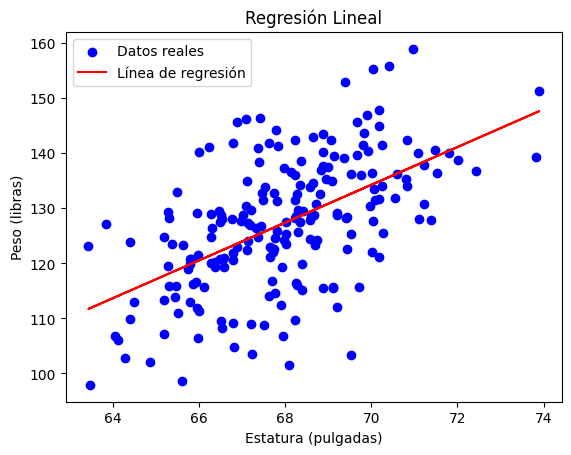

In [9]:
X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Estatura (pulgadas)')
plt.ylabel('Peso (libras)')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

# 5. Hallar correlación y valor p

In [10]:
correlation, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])
print('Correlación:', correlation)
print('Valor p:', p_value)

Correlación: 0.5568647346122992
Valor p: 1.1029015151266312e-17


# 6. Interpretar valor p

Se puede observar que el valor p es de 1.103e-17 lo cual es menor a 0.05, por lo que se puede rechazar la hipótesis nula y se puede decir que existe una relación significativa entre la estatura y el peso.